In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from env import host, username as user, password
import curriculum

# DBSCAN import
from sklearn.cluster import DBSCAN
# Scaler import
from sklearn.preprocessing import MinMaxScaler

In [2]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

url = get_db_url("grocery_db")

sql = """
select *
from grocery_customers
"""

df = pd.read_sql(sql, url, index_col="customer_id")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 30.9 KB


In [4]:
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [5]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [6]:
feats = df[['Fresh', 'Grocery', 'Frozen']]

scaler = MinMaxScaler()

scaler.fit(feats)

feats_scaled = scaler.transform(feats)
feats_scaled

array([[0.11294004, 0.08146416, 0.0031063 ],
       [0.06289903, 0.10309667, 0.02854842],
       [0.05662161, 0.08278992, 0.03911643],
       ...,
       [0.1295431 , 0.32594285, 0.00677142],
       [0.091727  , 0.02402535, 0.01664914],
       [0.02482434, 0.02702178, 0.00065742]])

In [7]:
dbsc = DBSCAN(eps = .05, min_samples = 20)

dbsc.fit(feats_scaled)

DBSCAN(eps=0.05, min_samples=20)

In [8]:
columns = ["Fresh", "Grocery", "Frozen"]
scaled_columns = ["Scaled_" + column for column in columns]

og_df = df.copy()

scaled_df = pd.DataFrame(feats_scaled, columns= scaled_columns)

df = df.merge(scaled_df, on=df.index)
df = df.drop(columns = ['key_0'])
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Fresh,Scaled_Grocery,Scaled_Frozen
0,2,3,12669,9656,7561,214,2674,1338,0.112940,0.081464,0.003106
1,2,3,7057,9810,9568,1762,3293,1776,0.062899,0.103097,0.028548
2,2,3,6353,8808,7684,2405,3516,7844,0.056622,0.082790,0.039116
3,1,3,13265,1196,4221,6404,507,1788,0.118254,0.045464,0.104842
4,2,3,22615,5410,7198,3915,1777,5185,0.201626,0.077552,0.063934


In [9]:
df['labels'] = dbsc.labels_
df.labels.value_counts()

 0    341
-1     99
Name: labels, dtype: int64

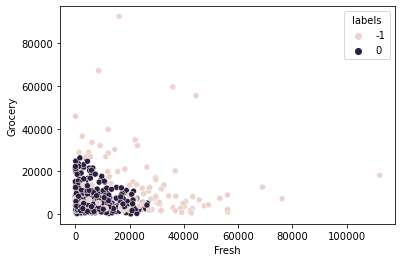

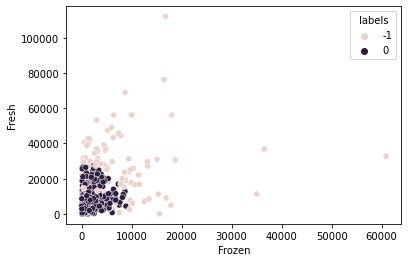

In [10]:
sns.scatterplot(df.Fresh, df.Grocery, hue = df.labels)
plt.show()

sns.scatterplot(df.Frozen, df.Fresh, hue = df.labels)
plt.show()

Text(0.5, 0, 'Grocery')

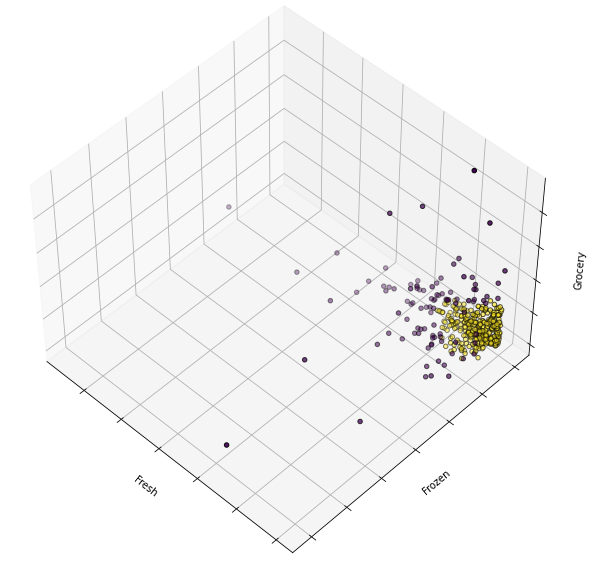

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Fresh, df.Frozen, df.Grocery,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Fresh')
ax.set_ylabel('Frozen')
ax.set_zlabel('Grocery')


In [12]:
df = curriculum.acquire_logs()

In [13]:
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [15]:
hits = curriculum.prep(df, 1)
hits.head()

date
2018-01-26    7
2018-01-27    1
2018-01-28    0
2018-01-29    6
2018-01-30    5
Freq: D, Name: endpoint, dtype: int64